# Classification case

### Задание  - аналитика по клиентам
Даны данные по клиентам в разрезе нескольких метрик - f1,...,f8. 
Необходимо:<br><i>
1) провести первичный анализ данных, найти все интересные зависимости, паттерны, аномальные явления.<br>
2) провести кластеризацию клиентов, обосновав выбор метода.<br>
3) насколько качественной и устойчивой получилась классификация? Можно ли ее улучшить, и если да - то как?</i><br>
Результаты представить в виде презентации или ipynb ноутбука (если используете Python) с вашими выводами и рассуждениями.

## 1. Формальная часть

### 1.1 Анализ данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Загрузим и посмотрим данные по клиентам

In [2]:
df = pd.read_excel('classification_case.xlsx',sheet_name='classific_data',index_col='client_id')

In [3]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000
6,4,825.257088,1.333333,12.763459,79.309928,5,1766.676667,10.944990
7,4,1876.023754,5.333333,7.842783,15.451739,8,38411.016667,1.613059
8,6,3079.223754,2.333333,34.176442,60.241964,7,6663.793320,51.893238
9,5,180710.730421,3.000000,1097.003284,61.357960,9,388755.600000,0.000000


In [4]:
df.tail(10)

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
38183,3,592.890421,2.000000,-0.338691,84.349955,4,13752.143333,0.000000
38184,2,255.557088,0.666667,-6.612934,19.749870,3,1279.333333,0.000000
38185,5,281.917088,3.333333,-31.326331,22.432685,6,1315.164335,0.000000
38186,5,240.403754,1.333333,-1.203186,61.964564,5,1271.393333,0.000000
38187,5,783.223754,3.333333,-10.765793,70.149481,4,2185.333333,0.000000
38188,2,432.100421,0.333333,-8.118225,56.533765,4,759.210000,0.000000
38189,5,1193.170421,5.000000,-77.019736,91.789573,3,1200.307001,3.816189
38190,6,4832.393754,1.666667,-8.216552,51.029172,8,12186.166667,17.819731
38191,3,144.557088,1.333333,-1.776450,10.654669,5,17727.470000,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38040 entries, 1 to 38192
Data columns (total 8 columns):
f1    38040 non-null int64
f2    38040 non-null float64
f3    38040 non-null float64
f4    38040 non-null float64
f5    38040 non-null float64
f6    38040 non-null int64
f7    38040 non-null float64
f8    38040 non-null float64
dtypes: float64(6), int64(2)
memory usage: 2.6 MB


Фичи f1 и f6 имеют целые значения

Посмотрим на статистику значений каждой из фич

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f1,38040.0,3.785699,2.369721,1.000000,2.000000,3.000000,5.000000,31.000000
f2,38040.0,1810.410978,8549.622878,2.890421,144.223754,387.890421,1189.452921,559162.570421
f3,38040.0,2.476095,3.422023,0.333333,0.666667,1.333333,3.000000,103.000000
f4,38040.0,9.340598,60.371825,-850.600995,-2.401181,-0.295001,6.474528,3393.505350
f5,38040.0,53.460713,33.597747,0.000290,21.757287,53.173011,86.342162,100.000000
f6,38040.0,4.689537,1.855597,2.000000,3.000000,4.000000,6.000000,16.000000
f7,38040.0,9670.809971,28707.222309,0.223333,977.612500,2789.128333,7857.293333,877269.496667
f8,38040.0,16.157004,29.472355,0.000000,0.000000,0.000000,19.907828,100.000000


Что сразу бросается в глаза:
<br>f1 значения от 1 до 31
<br>значения f2, f7 больше нуля и максимальные значения существенно больше других фич
<br>f3, f5 не имеют нулевых значений
<br>f6 начинается с двойки, то есть нет значений ноль и один
<br>f1 и f6 целые значения
<br>f5 и f8 сверху ограничены значением 100
<br>f8 начинается с нуля, и похоже единственная такая, далее проверим
<br>f4 единственная фича имеющая отрицательные значения

Посмотрим матрицу корреляции всех фич между собой

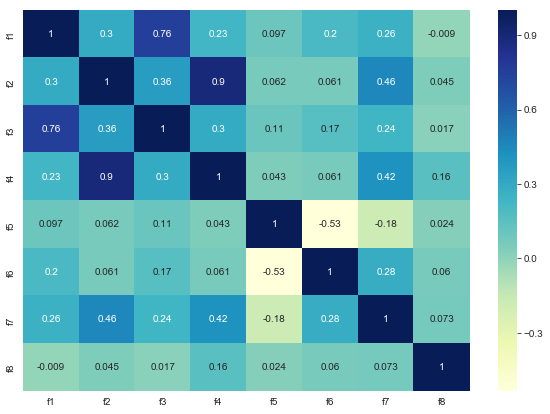

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

Очевидна сильная корреляция между фичами f2-f4 и f1-f3
<br>наблюдается небольшая статистическая зависимость между f5-f6
<br>и ещё более слабая зависимость между f2-f7

Посмотрим, как выглядят зависимости и распределение между всеми фичами на графике

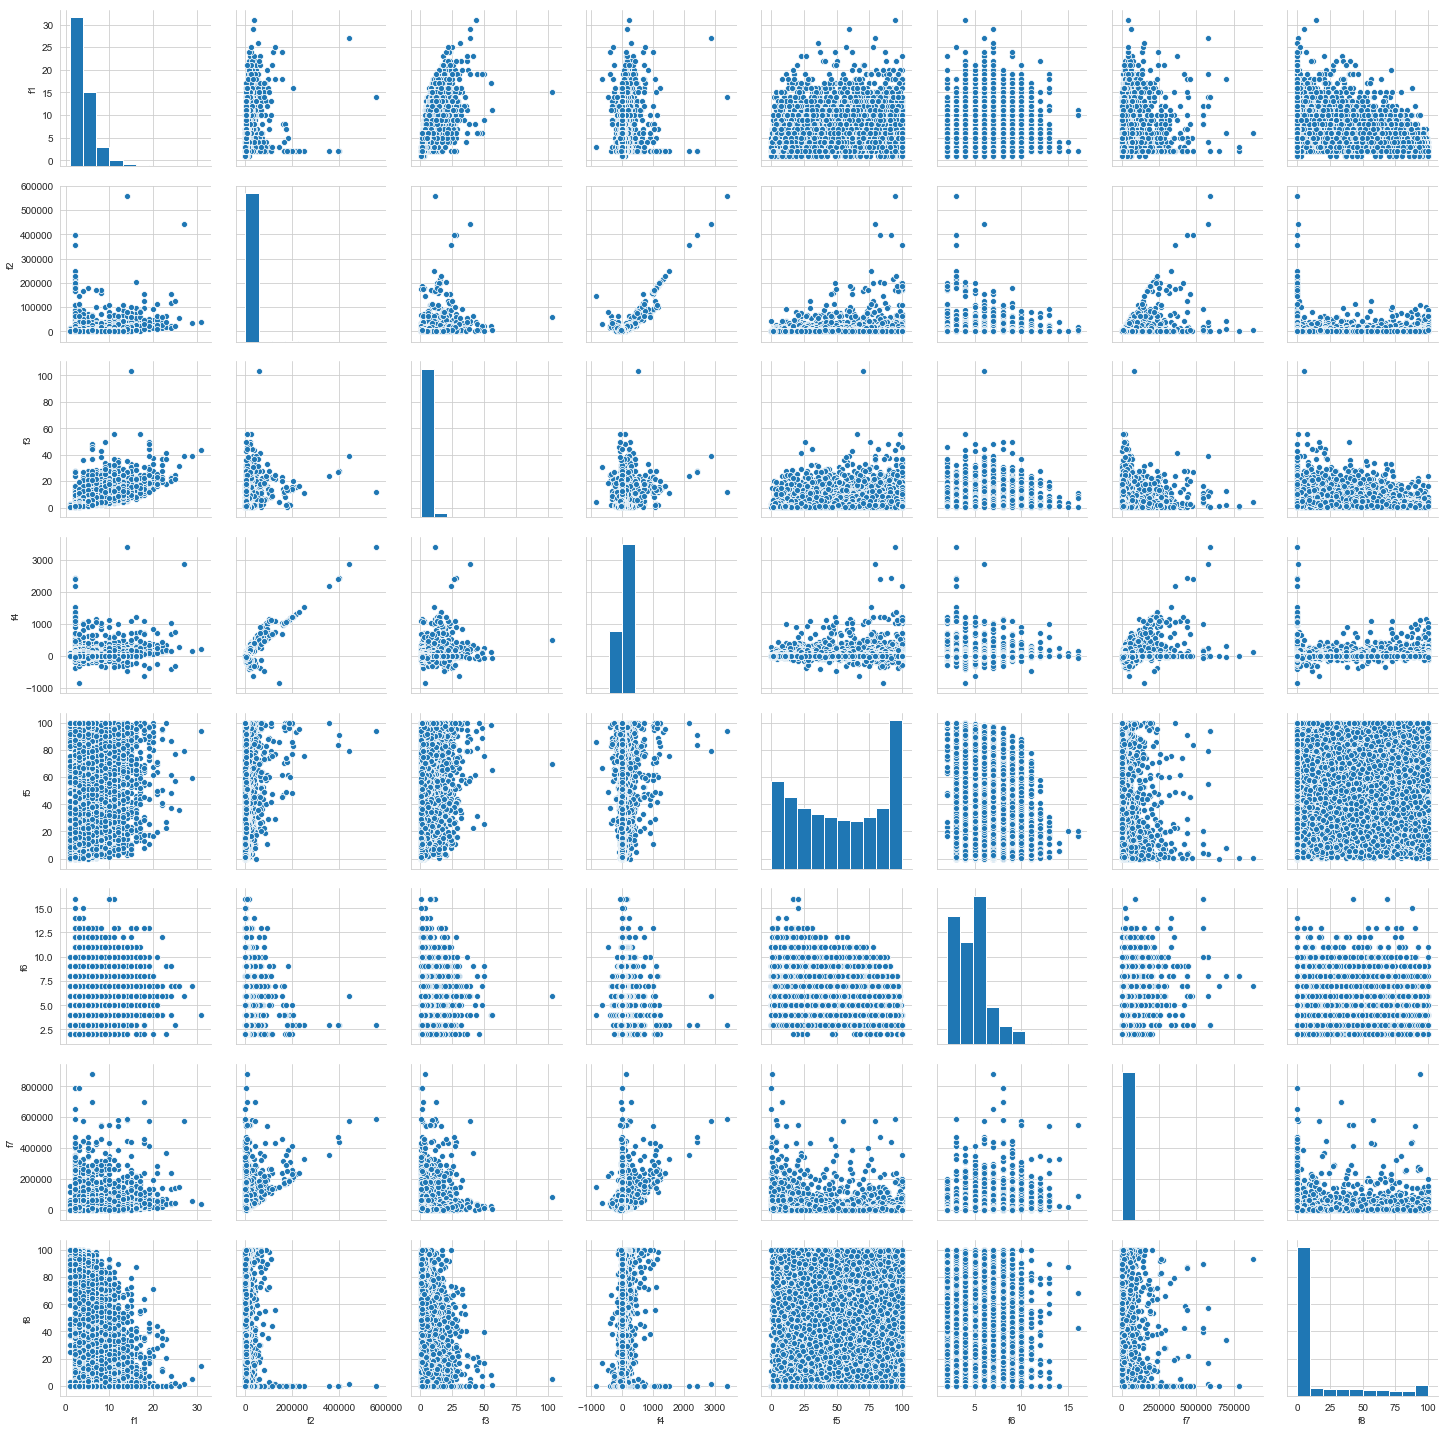

In [8]:
sns.pairplot(df)

Ещё построим тепловую карту иерархической кластеризации

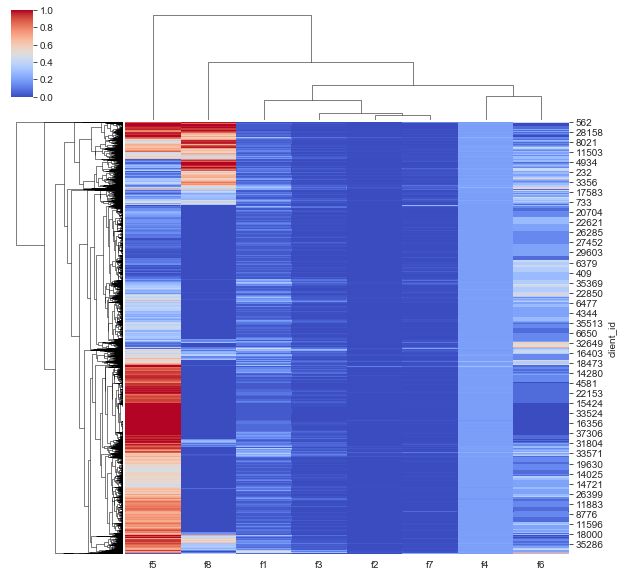

In [9]:
sns.clustermap(df,cmap='coolwarm',standard_scale=1)

Иерархия кластеризации фич получилась такая, что первой и, по-видимому, более значимой является фича f5, далее f8 и после уже все остальные. В таком порядке и будем их далее рассматривать.

### Фича f5

Построим график распределения значений фичи

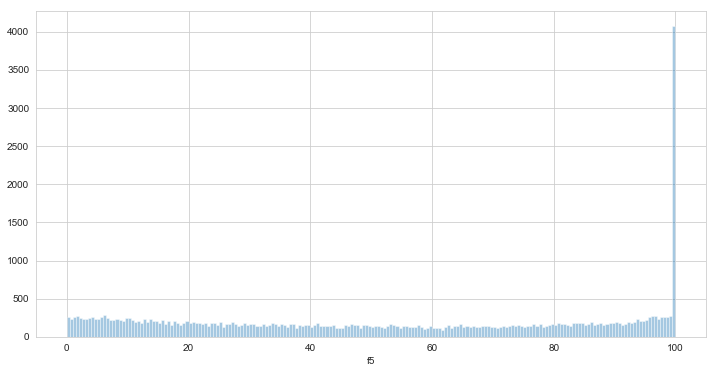

In [10]:
plt.figure(figsize=(12,6))
sns.distplot(df['f5'],kde=False,bins=200)

Видно, что все значения более или менее равномерно распределены в пределах от 0 до 100, кроме значений в районе 100. Посмотрим, какие это конкретно значения:

In [11]:
df.groupby('f5')['f5'].count().sort_index(ascending=False).head(10)

f5
100.000000    3824
99.998901        1
99.990001        1
99.988422        2
99.987352        1
99.985589        2
99.984665        2
99.983687        2
99.983404        2
99.980233        2
Name: f5, dtype: int64

И это значение ровно 100, таких значений ~ 10% от всех значений и это статистически значимо. Кстати, значений равных нулю нет. Посмотрим, как именно фича f5 равная 100 соотносится с другими фичами. 

#### f5 == 100

Посмотрим на статистику значений всех фич

In [12]:
df[df['f5']==100].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f1,3824.0,3.128138,1.729800,1.000000,2.000000,3.000000,4.000000,23.000000
f2,3824.0,1242.223312,7553.810384,2.890421,90.624588,258.068754,728.591254,199737.180421
f3,3824.0,1.793584,2.666240,0.333333,0.333333,1.000000,2.000000,45.666667
f4,3824.0,5.315970,50.172626,-279.852167,-2.373602,-0.489490,2.542599,1216.371057
f5,3824.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
f6,3824.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
f7,3824.0,2189.335705,8604.280325,0.223333,176.818333,636.908333,1785.262500,199734.290000
f8,3824.0,14.869826,30.450368,0.000000,0.000000,0.000000,0.000000,100.000000


In [13]:
df[df['f5']==100].groupby('f6')['f6'].count()

f6
2    3824
Name: f6, dtype: int64

Интересно, что для всех значений фичи f5 равной 100 фича f6 оказывается равной 2. Это и есть та небольшая статистическая зависимость, на которую обратили внимание в матрице корреляции.

Посмотрим, что происходит для всех значений фичи не равной 100 

#### f5 != 100

Опять немного статистики

In [14]:
df[df['f5']!=100].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f1,34216.0,3.859189,2.419739,1.000000,2.000000,3.000000,5.000000,31.000000
f2,34216.0,1873.911962,8651.580785,2.890421,152.890421,410.998754,1253.047088,559162.570421
f3,34216.0,2.552373,3.488100,0.333333,0.666667,1.333333,3.000000,103.000000
f4,34216.0,9.790393,61.390782,-850.600995,-2.403613,-0.266767,6.859073,3393.505350
f5,34216.0,48.259455,31.398166,0.000290,19.264515,46.312598,77.611756,99.998901
f6,34216.0,4.990122,1.711508,2.000000,4.000000,5.000000,6.000000,16.000000
f7,34216.0,10506.943873,30016.374796,1.686667,1185.333333,3230.951667,8699.640000,877269.496667
f8,34216.0,16.300860,29.357980,0.000000,0.000000,0.000000,21.136343,100.000000


Распределение значений фичи f6

In [15]:
df[df['f5']!=100].groupby('f6')['f6'].count()

f6
2       46
3     6991
4     8611
5     7450
6     5086
7     3114
8     1573
9      737
10     376
11     147
12      49
13      27
14       3
15       2
16       4
Name: f6, dtype: int64

Здесь распределение значений фичи f6 уже более равномерное.

Text(0, 0.5, 'количество')

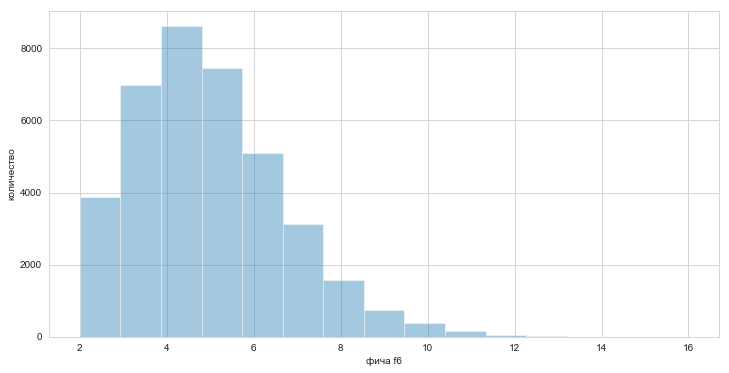

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(df['f6'],kde=False,bins=15)
plt.xlabel('фича f6')
plt.ylabel('количество')

Посмотрим подробнее как зависят между собой фичи f5-f6 на графике, где красным обозначены f5==100

In [17]:
df_temp = pd.DataFrame()

In [18]:
df_temp['56_color'] = df['f5'].apply(lambda x : 'red' if x == 100 else 'darkgray')

Text(0, 0.5, 'фича f5')

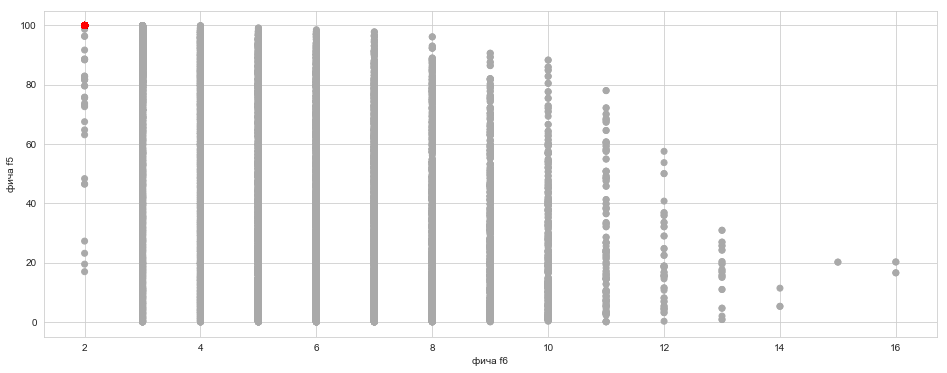

In [19]:
plt.figure(figsize=(16,6))
plt.scatter(df['f6'],df['f5'],c=df_temp['56_color'])
plt.xlabel('фича f6')
plt.ylabel('фича f5')

### Фича f8

Построим график распределения значений фичи

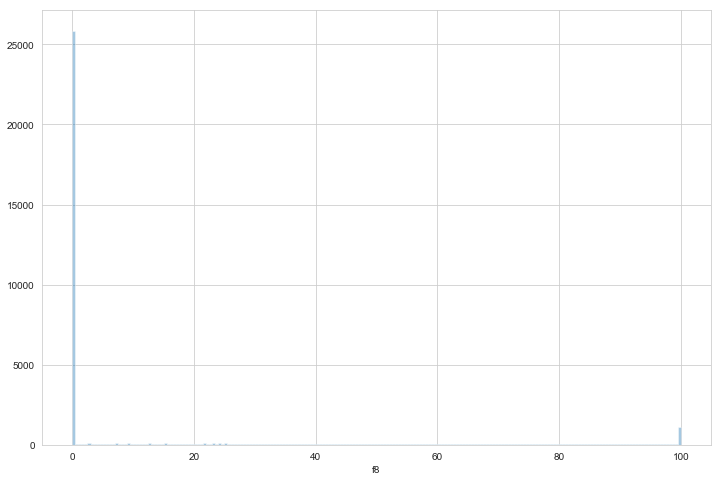

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df['f8'],kde=False,bins=200)

Посмотрим на распределение значений фичи в числовых значениях

In [21]:
df.groupby('f8')['f8'].count().sort_index().head()

f8
0.000000    25847
0.112838        2
0.180288        2
0.270119        2
0.311668        2
Name: f8, dtype: int64

In [22]:
df.groupby('f8')['f8'].count().sort_index().tail()

f8
99.978976        1
99.980766        2
99.986166        1
99.986303        2
100.000000    1046
Name: f8, dtype: int64

Подавляющее количество значений фичи сосредоточено в нуле, а именно 68%

In [23]:
df[df['f8']==0]['f8'].count()/df['f8'].count()

0.67946898002103051

И примено 3% значений фичи f8 равно 100

In [24]:
df[df['f8']==100]['f8'].count()/df['f8'].count()

0.027497371188222923

Посмотрим, что происходит со значениями внутри диапазона от 0 до 100 исключая сами крайние значения

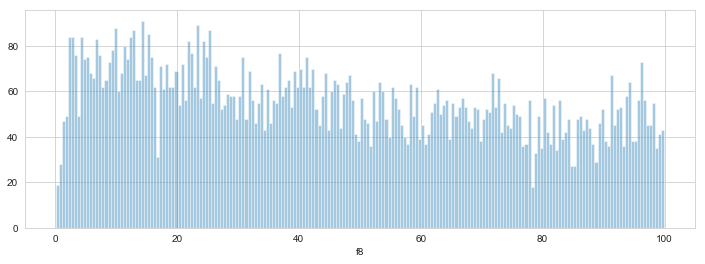

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(df[(df['f8']> 0) & (df['f8']<100)]['f8'],kde=False,bins=200)

Никаких других интересных вещей здесь мы не видим. 

Тогда посмотрим на статистику значений всех фич для фичи f8 равной 100

#### f8 == 100

In [26]:
df[df['f8']==100].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f1,1046.0,1.956023,0.205142,1.000000,2.000000,2.000000,2.000000,2.000000
f2,1046.0,2037.701246,5683.254104,2.890421,236.223754,669.557088,1669.557088,66669.557088
f3,1046.0,0.797323,0.913325,0.333333,0.333333,0.666667,1.000000,16.666667
f4,1046.0,28.795146,62.442646,-96.179581,7.619718,13.830426,25.438024,888.663033
f5,1046.0,52.970532,35.292332,0.098224,19.153885,48.700283,92.131737,100.000000
f6,1046.0,4.210325,1.642069,2.000000,3.000000,4.000000,5.000000,11.000000
f7,1046.0,6556.704409,14072.037513,8.666667,734.203203,2112.650000,5898.583333,199640.000000
f8,1046.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Видно, что тогда значения фичи f1 распределяются в пределах от 1 до 2. То есть при f8 == 100 фича f1 сразу ограничивается сверху значением 2.

In [27]:
df[df['f8']==100].groupby('f1')['f1'].count().sort_index().head(10)

f1
1      46
2    1000
Name: f1, dtype: int64

А какое тогда распределение значений фичи f1 для всех значений f8. Построим график.

([<matplotlib.axis.XTick at 0x20df3517f60>,
 <a list of 31 Text xticklabel objects>)

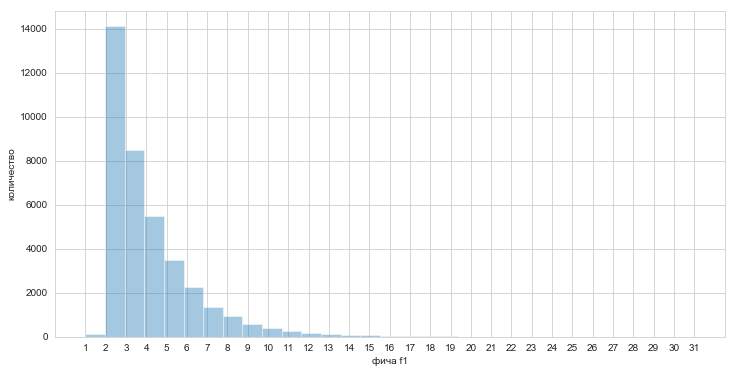

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(df['f1'],kde=False,bins=31)
plt.xlabel('фича f1')
plt.ylabel('количество')
plt.xticks(np.linspace(1,31,31))

И ещё раз тоже самое, только в цифрах

In [29]:
df.groupby('f1')['f1'].count().sort_index().head(10)

f1
1       115
2     14124
3      8484
4      5484
5      3491
6      2246
7      1342
8       933
9       595
10      384
Name: f1, dtype: int64

### Фича f4

Очевида линейная зависимость фичи f2 от f4. Чем большее по модулю фича f4, тем больше f2. Эту зависимость мы видели в матрице корреляции.

Text(0, 0.5, 'фича f2')

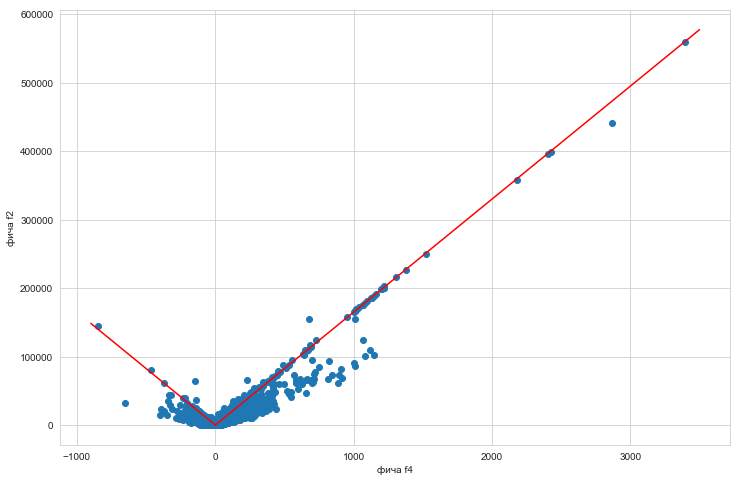

In [30]:
x_plus = np.arange(0,3500)
x_min = np.arange(-900,0)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
      
ax.scatter(df['f4'], df['f2'])
ax.plot(x_plus, x_plus*165, color='red')
ax.plot(x_min, -x_min*165, color='red')

ax.set_xlabel('фича f4')
ax.set_ylabel('фича f2')

В основном все значения лежат ниже этого "угла", но есть некоторые значения, которые выходя за пределы, например, такое:

In [31]:
df[(df['f4']>600) & (df['f4']<800) & (df['f2']>150000)]

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
16357,18,154393.147088,20.333333,675.146582,45.512234,6,455749.143333,0.0


Распределение значений

(-30, 60)

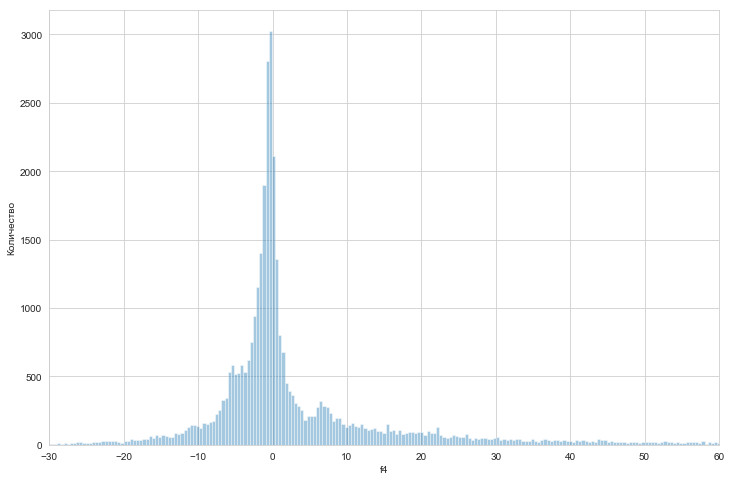

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(df['f4'],kde=False,bins=10000)
plt.xlabel('f4')
plt.ylabel('Количество')
plt.xlim(-30,60)

In [33]:
print(df.groupby('f4')['f4'].count().head())
print(df.groupby('f4')['f4'].count().tail())

f4
-850.600995    1
-651.272699    1
-464.401765    1
-401.553801    1
-388.904941    1
Name: f4, dtype: int64
f4
2177.233099    1
2407.562241    1
2426.277265    1
2864.942484    1
3393.505350    1
Name: f4, dtype: int64


Количество отрицательных значений фичи f4

In [34]:
df[df['f4']<0]['f4'].count()

20727

Количество положительных значений фичи f4

In [35]:
df[df['f4']>=0]['f4'].count()

17313

In [36]:
pd.DataFrame(df['f4']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f4,38040.0,9.340598,60.371825,-850.600995,-2.401181,-0.295001,6.474528,3393.50535


Хотя имеет место быть смещение по количеству значений фичи в отрицательную сторону всё же арифметическое среднее всех значений фичи положительное.

Ещё немного графиков с распределением значений фич

### Фича f3

(0, 30)

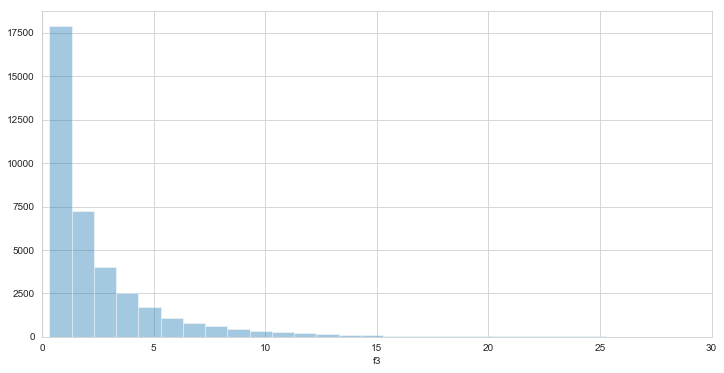

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(df['f3'],kde=False,bins=103)
plt.xlim(0,30)

In [38]:
df.groupby('f3')['f3'].count().head(15)

f3
0.333333    8408
0.666667    5594
1.000000    3885
1.333333    3000
1.666667    2313
2.000000    1910
2.333333    1660
2.666667    1290
3.000000    1081
3.333333     969
3.666667     835
4.000000     724
4.333333     649
4.666667     554
5.000000     510
Name: f3, dtype: int64

In [39]:
df.groupby('f3')['f3'].count().tail()

f3
48.333333     1
49.666667     2
55.666667     1
56.000000     1
103.000000    1
Name: f3, dtype: int64

Из особенностей: всё значения фичи f3 кратны 0,(33)

Ещё есть аномальное значение фичи f3 равное 103 резко выбивающееся из общего ряда. Так же видно на графике ниже.

In [40]:
df[df['f3']==103]

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
15900,15,59911.713754,103.0,499.435702,69.947311,6,83552.746667,5.128262


Посмотрим на зависимость фичи f1 от f3 в разрезе фичи f4 (меньше нуля - красный, больше либо равно нулю - зеленый)

In [41]:
df_temp['12_color'] = pd.DataFrame(df['f4'].apply(lambda x : 'green' if x > 0 else 'red'))

Text(0, 0.5, 'фича f3')

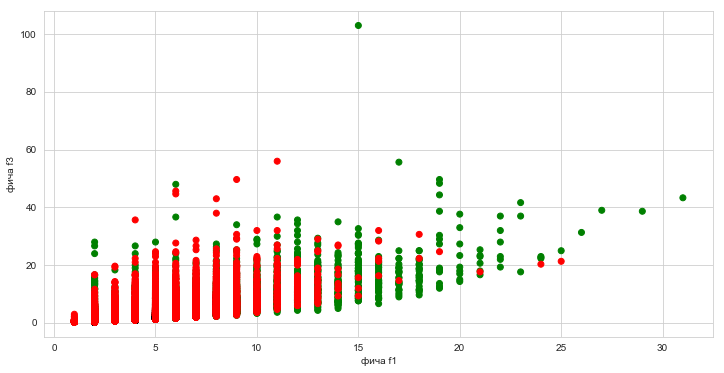

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(df['f1'],df['f3'],c=df_temp['12_color'])
plt.xlabel('фича f1')
plt.ylabel('фича f3')

Наблюдается устойчивое нелинейное увеличение минимального значения фичи f3 при увеличении значений фичи f1.

### Фича f6

Распределение значений фичи f6

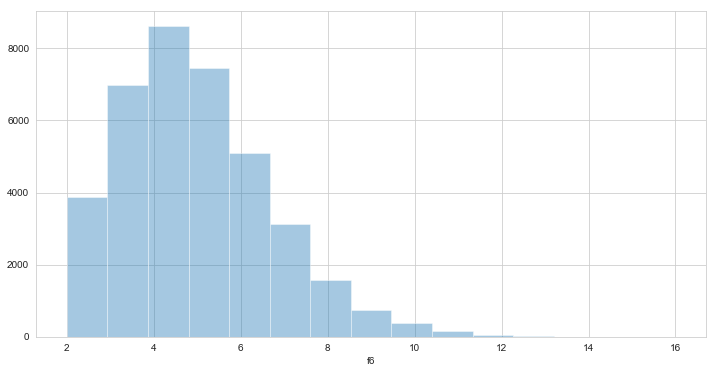

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(df['f6'],kde=False,bins=15)

### Фича f2 и f7

Эти две фичи очень похожи друг на друга по своим характеристикам и резко отличаются от всех остальных фич.

In [44]:
df[['f2','f7']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f2,38040.0,1810.410978,8549.622878,2.890421,144.223754,387.890421,1189.452921,559162.570421
f7,38040.0,9670.809971,28707.222309,0.223333,977.612500,2789.128333,7857.293333,877269.496667


Посмотрим на зависимость одной фичи от другой.

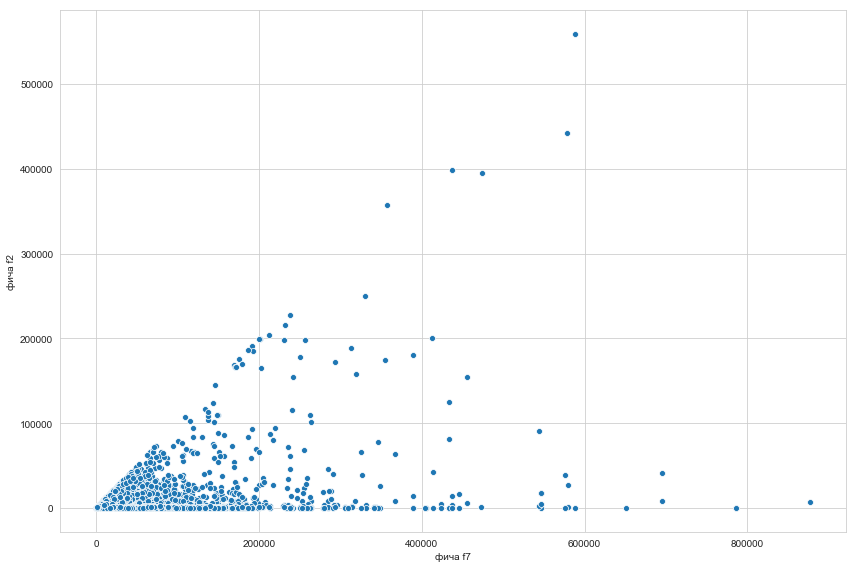

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot('f7','f2',data=df[['f2','f7']])
plt.xlabel('фича f7')
plt.ylabel('фича f2')
plt.tight_layout()

Исходя из графика, похоже, что фича f2 никогда не превышает f7. Проверим это в числах.

In [46]:
pd.DataFrame(df['f7']-df['f2']).sort_values([0]).head(10)

,0
client_id,
13749,-2.890421
257,-2.890421
13347,-2.890421
4104,-2.890421
16007,-2.890421
2239,-2.890421
10143,-2.890421
63,-2.890421
9125,-2.890421


похоже, что работает, но с некоторым допущением, есть маленькая отрицательная разница, которая не превышает -2,890421

Всего таких значений порядка ~1300. Оценим их визуально в датасете.

In [47]:
df[(df['f7']-df['f2']) < 0].head()

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
4,3,4413.223754,0.666667,25.565524,100.0,2,4410.333333,0.0
5,2,1669.557088,0.333333,21.997435,100.0,2,1666.666667,100.0
29,2,149.557088,0.333333,0.223062,100.0,2,146.666667,0.0
63,5,6543.223754,2.000000,37.217110,100.0,2,6540.333333,0.0
74,2,155.557088,0.666667,0.270212,100.0,2,152.666667,0.0


In [48]:
df[(df['f7']-df['f2']) < 0].tail()

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
38144,2,36.150421,0.333333,-0.466819,94.32785,3,35.260000,0.0
38166,2,185.890421,0.333333,-2.318157,100.00000,2,183.000000,0.0
38170,2,9.223754,0.333333,-5.705229,100.00000,2,6.333333,0.0
38177,2,128.557088,1.000000,-14.972706,100.00000,2,125.666667,0.0
38178,3,200.143754,1.333333,-14.841834,100.00000,2,197.253333,0.0


Ничего примечательного. Ок, идем дальше.

Попробуем посмотреть на зависимость фичи f1 от f2 в разрезе фичи f4 (меньше нуля - красный, больше либо равно нулю - зеленый)

In [49]:
#df_temp['12_color'] = pd.DataFrame(df['f4'].apply(lambda x : 'green' if x > 0 else 'red'))

Text(0, 0.5, 'фича f2')

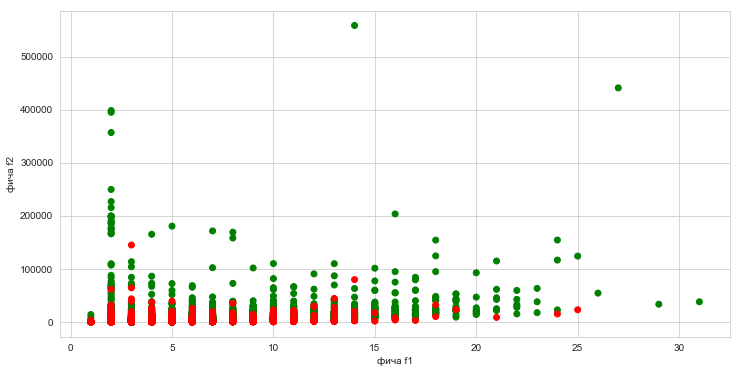

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(df['f1'],df['f2'],c=df_temp['12_color'])
plt.xlabel('фича f1')
plt.ylabel('фича f2')

Наблюдается общая тенденция к тому, что для положительных значений f4 фичи f1-f2 принимают большие значения, чем для отрицательных значений f4.

Это пожалуй всё из интересных зависимостей, переходим к кластеризации.

### 1.2 Кластеризация клиентов

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,MiniBatchKMeans

Для кластеризации клиентов из датасета воспользуемся руководством по выбору оценщика sci learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Отвечая на вопросы продвигаемся к рекомендуемому оценщику:
<br>семплов больше 50 шт - да
<br>предсказание категории - да
<br>данные помечены - нет
<br>число категорий известо - да
<br>семплов меньше 10 тыс. шт - нет
<br>Тогда наш вариант - <b>MiniBatch KMeans</b>

Преимущество метода классификации на основе К-средних в том, что он достаточно хорошо изучен, прост в понимании, интерпретации и реализации, в виду чего завоевал большую популярность, но вместе с тем он ограничен вычислительными возможностями, так же требуется знать конечное число кластеров на которое будет разбиваться всё множество.

Пока будем исходить из предположения, что мы не знаем конечное число кластеров на которое надо разбить множество. Попробуем его найти.
<br>Задача выбора оптимального количества кластеров для набора данных для которых мы его не знаем окончательно ещё не решена, но воспользуемся следующим подходом, который заключается в том, чтобы методом перебора выбрать такое минимальное количество кластеров при котором увеличение количества кластеров уже не дает существенного уменьшения коэффициента "инерции" (суммы квадратов расстояний элементов кластера до их центра).

In [52]:
scaler = MinMaxScaler()

Сделаем нормализацию данных

In [53]:
scaled = scaler.fit_transform(df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    #km = KMeans(n_clusters=k)
    km = MiniBatchKMeans(n_clusters=k, random_state=None, batch_size=200)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

In [55]:
km.inertia_

945.99613546827732

Посмотрим на зависимость "инерции" от выбранного количества кластеров

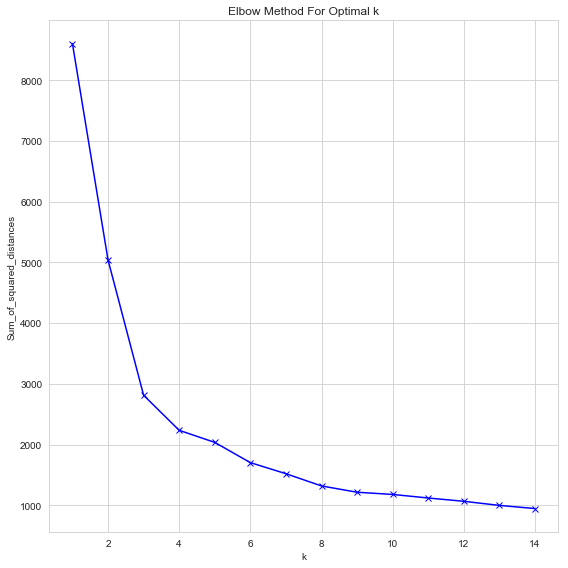

In [56]:
plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.tight_layout()

Для наших данных путь количество кластеров будет = 3, так как дальнейшее увеличение количества уже не дает существенного уменьшения инерции. Посмотрим, как это будет выглядеть на данных.

In [57]:
#kmeans = KMeans(n_clusters=4)
kmeans_minibatch = MiniBatchKMeans(n_clusters=3, random_state=1, batch_size=200)

In [58]:
#scaled = scaler.fit_transform(df)

In [59]:
#kmeans.fit(scaled)

In [60]:
kmeans_minibatch.fit(scaled)

MiniBatchKMeans(batch_size=200, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [61]:
#kmeans.cluster_centers_

In [62]:
kmeans_minibatch.cluster_centers_

array([[ 0.10102466,  0.00378525,  0.02446912,  0.20220469,  0.83970977,
         0.12314787,  0.00565345,  0.03966786],
       [ 0.08746072,  0.00211926,  0.01774469,  0.20121747,  0.22998412,
         0.25376776,  0.0148512 ,  0.0458602 ],
       [ 0.08763773,  0.00448179,  0.0205506 ,  0.20713665,  0.5612335 ,
         0.20337206,  0.01433957,  0.76575554]])

In [63]:
#kmeans.labels_

In [64]:
kmeans_minibatch.labels_

array([0, 1, 1, ..., 1, 1, 2])

Теперь дабавим к нашим данным метки, соответствующие кластерам.

In [65]:
df_labled = df.copy()

In [66]:
df_labled['label'] = kmeans_minibatch.labels_

In [67]:
df_temp['f8_color'] = df_labled['label'].apply(lambda x : 'sandybrown' if x == 2 else ('cornflowerblue' if x == 0 else 'limegreen'))

In [68]:
df_labled.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261,0
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000,1
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000,1
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000,0
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000,2
6,4,825.257088,1.333333,12.763459,79.309928,5,1766.676667,10.944990,0
7,4,1876.023754,5.333333,7.842783,15.451739,8,38411.016667,1.613059,1
8,6,3079.223754,2.333333,34.176442,60.241964,7,6663.793320,51.893238,2
9,5,180710.730421,3.000000,1097.003284,61.357960,9,388755.600000,0.000000,0


Посмотрим, как выглядят теперь все данные разбитые на три кластера помеченные каждый своим цветом.

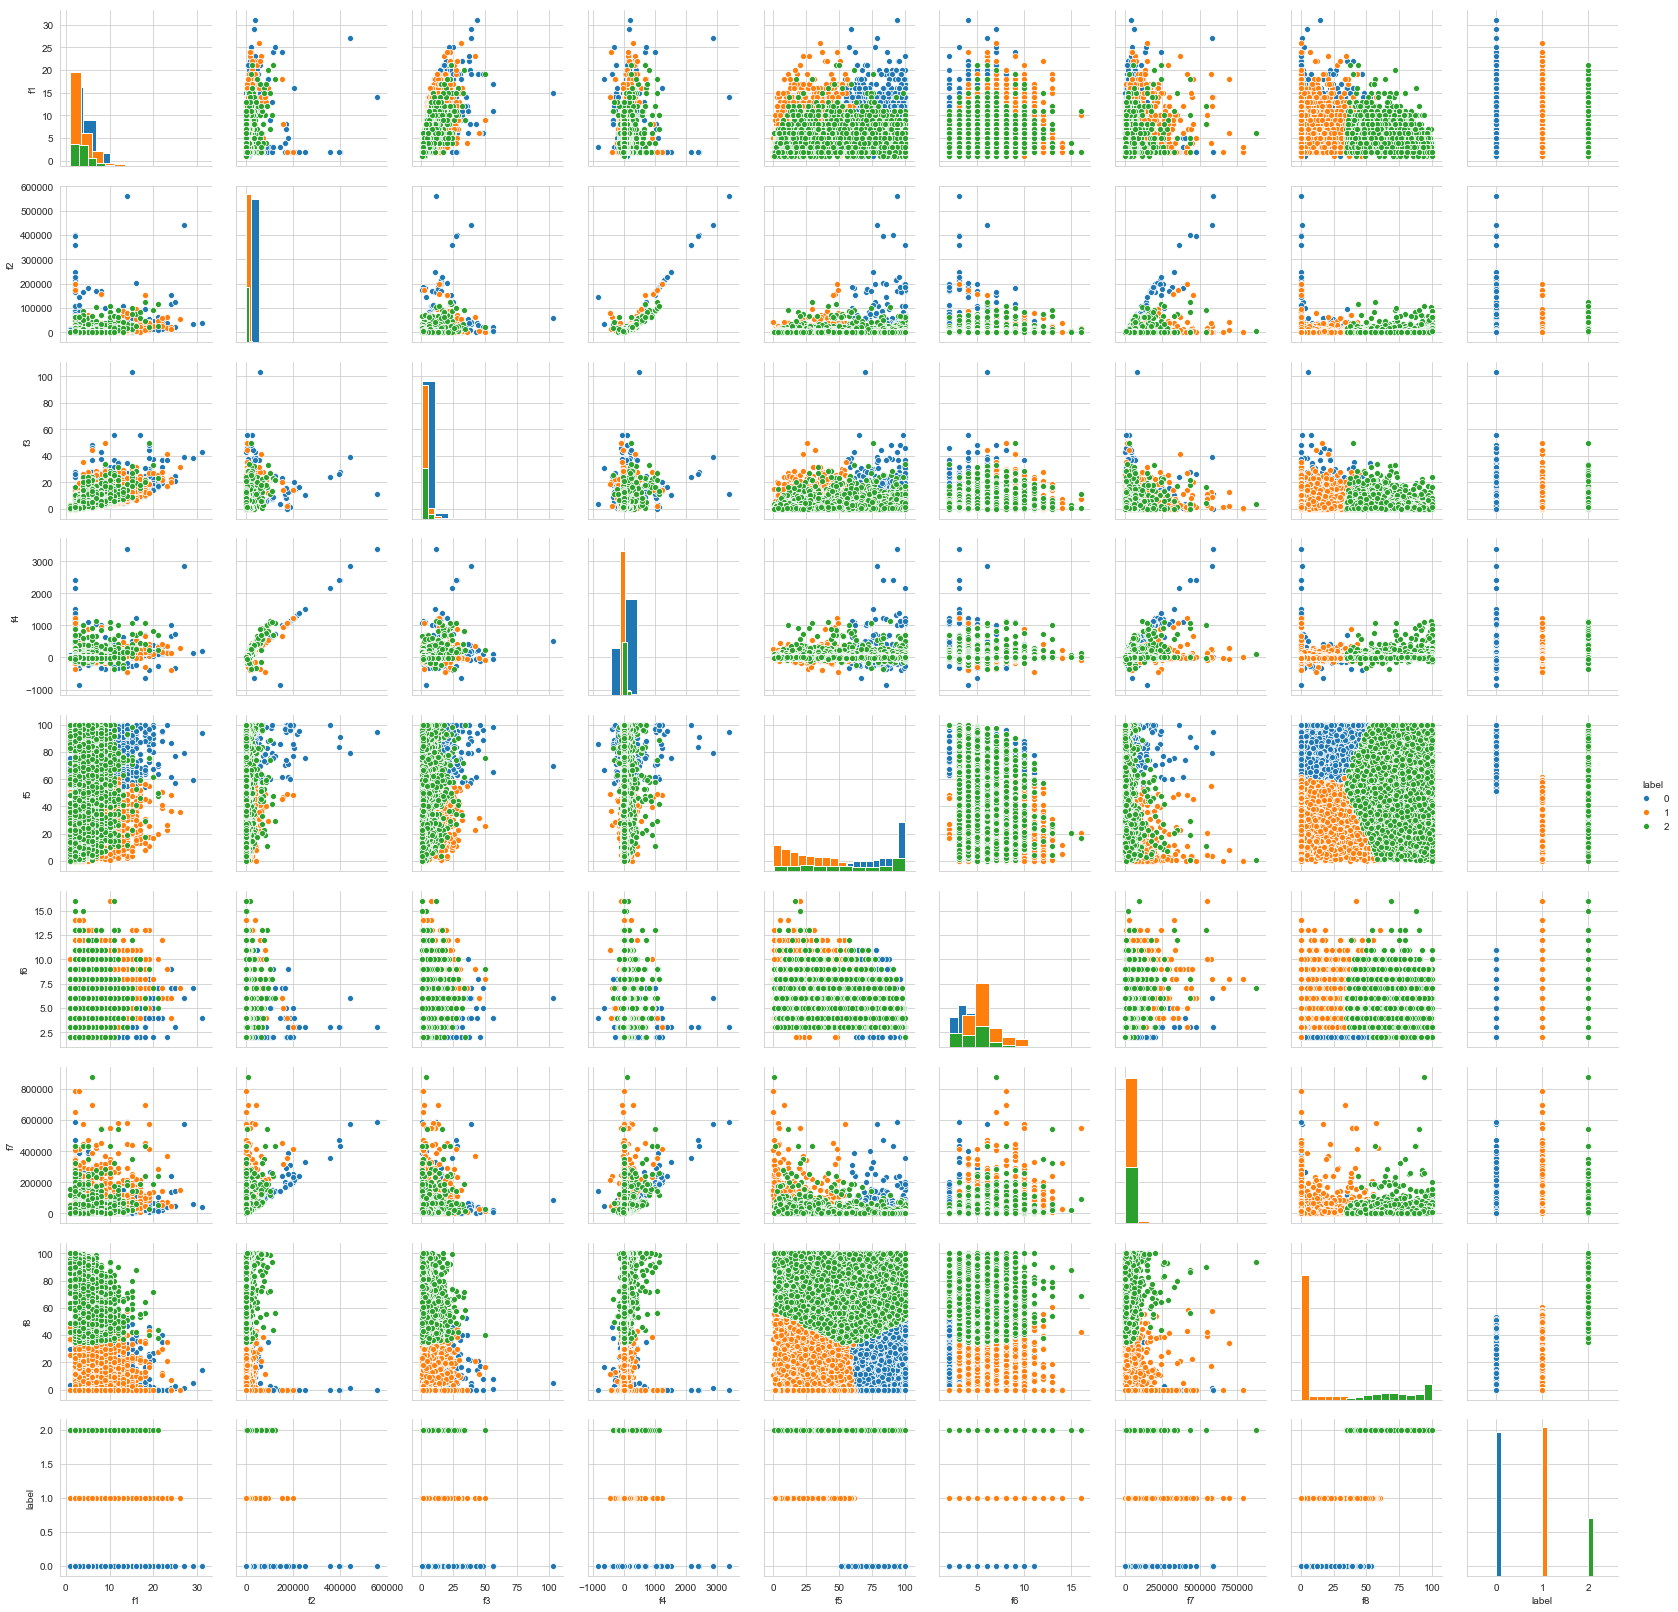

In [69]:
sns.pairplot(df_labled,hue='label',diag_kind='hist')

Чуть более подробно в разрезе фич f8-f2 так же с разбивкой на кластеры.

Text(0, 0.5, 'фича f8')

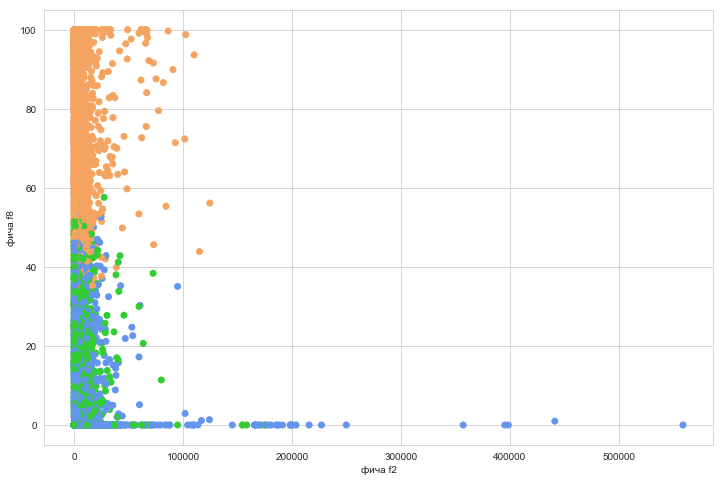

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(df_labled['f2'],df_labled['f8'],c=df_temp['f8_color'])
plt.xlabel('фича f2')
plt.ylabel('фича f8')

Посмотрим на числовые значения каждого из классов. Сначала распределение кластеров по количеству.

In [71]:
df_labled.groupby('label')['label'].count()

label
0    15606
1    16188
2     6246
Name: label, dtype: int64

Теперь в целом как выглядят данные.

In [72]:
df_labled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261,0
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000,1
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000,1
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000,0
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000,2


Данные отнесенные к первому классу

In [73]:
df_labled[df_labled['label']==0].head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261,0
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000,0
6,4,825.257088,1.333333,12.763459,79.309928,5,1766.676667,10.944990,0
9,5,180710.730421,3.000000,1097.003284,61.357960,9,388755.600000,0.000000,0
12,3,1246.263754,0.666667,15.601422,73.781042,5,1887.883333,0.000000,0


Данные отнесенные ко второму классу

In [74]:
df_labled[df_labled['label']==1].head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000,1
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000,1
7,4,1876.023754,5.333333,7.842783,15.451739,8,38411.016667,1.613059,1
10,5,975.223754,2.000000,1.915811,24.883470,5,4314.778663,0.000000,1
11,6,2537.840421,7.333333,6.802687,12.984354,7,21947.003333,0.000000,1


И самое интересное данные отнесенные к третьему классу, более малочисленному.

In [75]:
df_labled[df_labled['label']==2].head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000,2
8,6,3079.223754,2.333333,34.176442,60.241964,7,6663.793320,51.893238,2
18,4,664.223754,1.000000,9.613966,47.442632,7,1231.670000,41.614475,2
20,2,236.223754,0.333333,7.950903,4.571876,3,5103.666667,77.177508,2
30,2,2436.223754,1.000000,40.848482,28.607051,6,8506.061307,96.894080,2
43,3,479.557088,1.000000,14.917890,27.302060,5,1343.000000,76.923077,2
44,2,1502.890421,0.666667,18.099187,83.860087,5,2668.333333,67.164179,2
46,2,2302.890421,1.333333,45.182299,8.127938,5,30897.133333,91.586031,2
50,3,1690.057088,2.000000,30.029353,80.513639,4,2181.203937,95.138426,2


Немного статистики для фичи f8 соответствующей третьему классу

In [76]:
pd.DataFrame(df_labled[df_labled['label']==2]['f8']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f8,6246.0,76.50483,18.46639,34.518467,61.555257,76.801525,94.560136,100.0


Похоже, что третий класс отличается от первых двух тем, что сильно смещен по значениям в сторону больших значений фичи f8 начиная от ~34 и до 100. И наоборот первые два класса в основном распределены по значениям фичи f8 от 0 до 33.

Получилось ли у нас произвести качественную кластеризацию клиентов? Возможно, что недостаточно хорошо, потому что нет понимая, что это за данные и что нам дает эта кластеризация. Попробуем с этим разобраться во второй части данного исследования.

## 2. Часть предположений

Чтобы сделать качественную оценку и анализ данных, желательно понимать, что за данные имеем, как они были сформированы и какие у них есть взаимосвязи, но поскольку данные анонимизированы, попробуем сделать некоторые предположения из ранее сделанных наблюдений. Поскольку данные по клиентам были получены от кредитной организации, возможно, они имеют отношение к кредитованию, посмотрим на них с этой точки зрения.

### 2.1 Первичные предположения

In [77]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000


Начнем с фичи f8 как наиболее статистически значимой,
<br>f8 - возможно, процент непогашенного остатка ранее взятого кредита, полагаю, что это целевая фича, которую надо будет оценивать и предсказывать особенно для значений равных 100
<br>f5 - возможно, процент остатка по текущему кредиту, нет нулевых значений, значит в датасете только клиенты с непогашенным кредитом
<br>f1 - возможно, количество кредитов (включая текущий), так для тех, кто не вернул прошлый кредит полностью, то есть f8 = 100 (100% невозврат кредита) ставится ограничение на выдачу новых кредитов до полного погашения ранних/текущих кредитов, поэтому f1 всегда для них не больше 2
<br>f2 - возможно, сумма текущего долга
<br>f6 - возможно, количество месяцев просрочки, почему отсутствуют первые два числа, это может быть связано с льготным периодом кредитования, когда первые два месяца проценты не начисляются
<br>f7 - возможно, сумма всех выданных кредитов (текущий + ранние)
<br>f3 - ?? возможно, какая-то мера заинтересованности кредитной организации в данном клиенте, или коэффициент скидки для привлечения
<br>f4 - ?? возможно это некий коэффициент или фактор риска клиента или качество исполнения кредитных обязательств. Клиенты имеющие положительный фактор риска получают бо'льшие кредитные лимиты. Но "качественных" клиентов в целом меньше, то есть например, таких которые не допускают просрочки по кредиту.

### 2.2 Повторная кластеризация

Исходя из предположений выше сделаем кластеризацию вручную беря во внимание фичу f8, так тех клиентов кто совершенно не погасил кредитные обязательства выделим в отдельный кластер "2", оставшихся ещё разобьем на два кластера тех, кто частично погасил обязательства "1" и тех кто не имеет непогашенных ранее взятых обязательств "0".

In [78]:
df_labled2 = pd.DataFrame()
df_labled2 = df.copy()

In [79]:
df_labled2['label'] = df_labled2['f8'].apply(lambda x : 2 if x==100 else (0 if x==0 else 1))

In [80]:
df_labled2.head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261,1
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000,0
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000,0
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000,0
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000,2


Посмотрим на распределение меток

In [81]:
df_labled2.groupby('label')['label'].count()

label
0    25847
1    11147
2     1046
Name: label, dtype: int64

Получется, что "плохих" клиентов около 3%

In [82]:
df_labled2[df_labled2['label']==2]['label'].count()/df_labled2['label'].count()

0.027497371188222923

Посмотрим на распределение кластеров на графиках

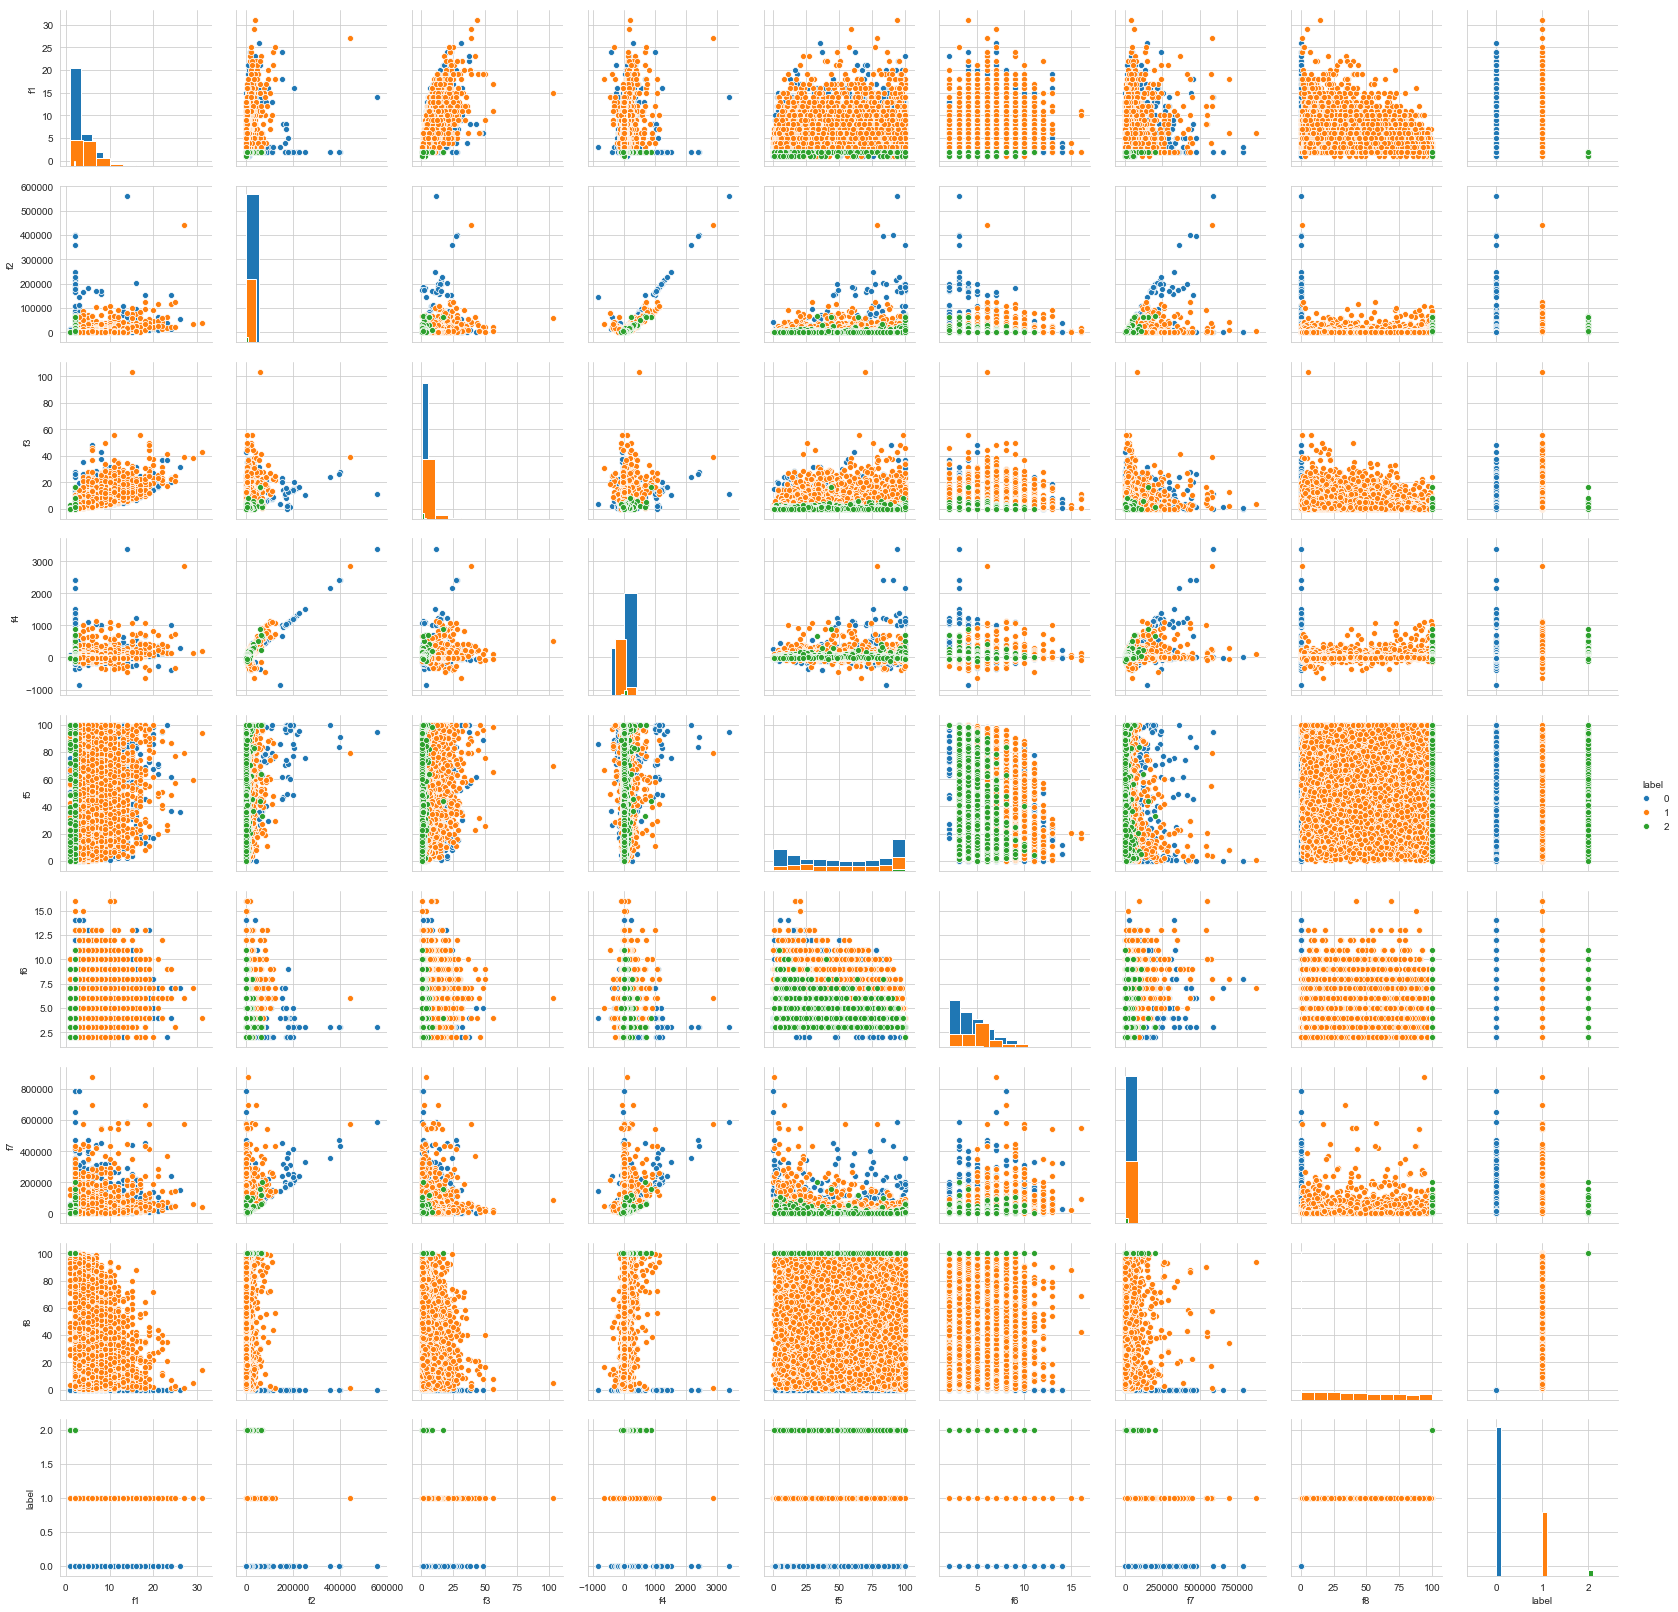

In [83]:
sns.pairplot(df_labled2,hue='label',diag_kind='hist')

И немного более детально в разрезе фич f2-f8

In [84]:
df_temp['f8_2_color'] = df_labled2['label'].apply(lambda x : 'sandybrown' if x == 2 else ('cornflowerblue' if x == 0 else 'limegreen'))

Text(0, 0.5, 'фича f8')

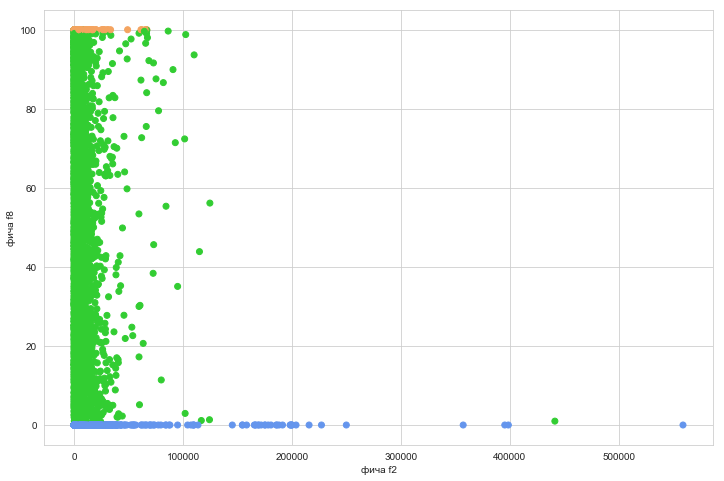

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(df_labled2['f2'],df_labled2['f8'],c=df_temp['f8_2_color'])
plt.xlabel('фича f2')
plt.ylabel('фича f8')

### 2.3 Предиктивная модель

Попробуем построить предиктивную модель, которая бы пыталась относить клиентов к соответствующему классу на основе имеющихся данных и текущих предположениях.

Вновь разделим все данные, но только теперь на два класса: "плохих" и "хороших" клиентов, то есть тех, кто полностью не погасил прошлые обязательства и всех остальных.

In [86]:
df_labled3 = pd.DataFrame()
df_labled3 = df.copy()

In [87]:
df_labled3['label'] = df_labled3['f8'].apply(lambda x : 1 if x==100 else 0)

In [88]:
df_labled3.head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
client_id,,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261,0
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000,0
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000,0
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000,0
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000,1


Для выбора оценщика вновь воспользуемся руководством из sci learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Отвечая на вопросы продвигаемся к рекомендуемому оценщику:
<br>семплов больше 50 шт - да
<br>предсказание категории - да
<br>данные помечены - <i>теперь</i> да
<br>семплов меньше 100 тыс. шт - да
<br>Тогда наш вариант - <b>SVC</b>

Классификатор на основе <b>метода опорных векторов</b> является один из наиболее быстрых методов и позволяет избежать предварительного понимания поведения значений внутри данных, грубо говоря работает по принципу черного ящика, то есть идеальный кандидат для первичных оценок.

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [90]:
model_svc = SVC()

In [91]:
X = df_labled3.drop(['f8','label'],axis=1)
y = df_labled3['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model_svc.fit(X_train,y_train)

predictions = model_svc.predict(X_test)

print('Матрица неточностей')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Метрики классификации')
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Матрица неточностей
[[11090     0]
 [  313     9]]


Метрики классификации
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11090
           1       1.00      0.03      0.05       322

   micro avg       0.97      0.97      0.97     11412
   macro avg       0.99      0.51      0.52     11412
weighted avg       0.97      0.97      0.96     11412



Точность модели довольно высока. Видим, что ошибка сосредоточена в ложно-отрицательных решениях. Но утверждать, что мы построили хорошую модель для выявления "плохих" клиентов кредитной организации рано, так как мы исходили из предположений, что же значит каждая из фич.

По сути мы построили модель, которая довольно неплохо предсказывает в каких случаях фича f8 будет равной 100. Это будет более точным описанием того, что мы сделали.

### 2.4 Возможности для улучшения

Часто данные имеющие отношение к кредитованию несбалонсированы, так клиенты имеющие серьезные просрочки по кредитам составляют незначительный процент (в районе 3-5%) от общего объема кредитуемых клиентов. И стандартные методы построения моделей сколны игнорировать классы меньшинства, которые по сути являются главной целью модели. Решением данной проблемы может быть построение случайных выборок данных для тренировки модели сбалансированных по классам, с тем чтобы модель более качественно определяла истинный класс клиента.